In [1]:
#pip install plotly

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import plotly.express as px
import seaborn as sns

In [49]:
# Load the .xls file using the xlrd engine
df = pd.read_excel("DEAL_Bitrix.xlsx")
# Display the first few rows of the dataframe
df.head()

OSError: [Errno 22] Invalid argument: 'DEAL_Bitrix.xlsx'

In [50]:
for col in df.columns:
    print(f"Column: {col}")
    print(f"Data Type: {df[col].dtype}")
    print(f"Number of Unique Values: {df[col].nunique()}")
    print(f"Number of Missing Values: {df[col].isnull().sum()}")
    print(f"Sample Values: {df[col].unique()[:5]}")
    print("-" * 30)

Column: ID
Data Type: int64
Number of Unique Values: 3319
Number of Missing Values: 0
Sample Values: [9407 9405 9403 9401 9399]
------------------------------
Column: Created
Data Type: datetime64[ns]
Number of Unique Values: 868
Number of Missing Values: 0
Sample Values: <DatetimeArray>
['2024-10-22 17:06:56', '2024-10-22 17:05:55', '2024-10-22 17:05:41',
 '2024-10-22 14:11:15', '2024-10-22 14:11:14']
Length: 5, dtype: datetime64[ns]
------------------------------
Column: Modified
Data Type: datetime64[ns]
Number of Unique Values: 2588
Number of Missing Values: 0
Sample Values: <DatetimeArray>
['2024-10-22 17:07:00', '2024-10-22 17:07:47', '2024-10-22 14:20:19',
 '2024-10-22 14:20:18', '2024-10-22 14:20:16']
Length: 5, dtype: datetime64[ns]
------------------------------
Column: Stage
Data Type: object
Number of Unique Values: 10
Number of Missing Values: 0
Sample Values: ['Reach' 'Attract' 'Develop' 'Meeting Booked' 'SQL']
------------------------------
Column: Created by
Data Type: 

In [51]:
# Selecting columns we need for analysis
sel_cols = f"ID, Created, Modified, Stage, Created by, Modified by, Responsible, Repeat inquiry, Deal Name, Type, Source, Company, Contact, UTM Source, UTM Medium, UTM Campaign, UTM Content, UTM Term, Lead Status, Reason for Loss, Reasons for Win, Follow Up Status, Nature of Project, Services, LS - Service Fit, LS - Urgency, LG - Budget Availability, LG - Decision Making Capability, Contact: ID, Contact: First name, Contact: Last name, Contact: Position, Contact: Responsible person, Contact: Source, Contact: Work Phone, Contact: Mobile, Contact: Shopify Store URL, Contact: Do you have a shopify website, Contact: Do you want to build a shopify website, Contact: Do you have a D2C/eCommerce webiste, Contact: Do you need any help with your online business?, Company: Company Name"
sel_cols_list = sel_cols.split(", ")
df = df[sel_cols_list]
# df.info()

In [52]:
# Modifying time columns to datetime variable
df['Created'] = pd.to_datetime(df['Created'], format='%d.%m.%Y %H:%M:%S')
df['Modified'] = pd.to_datetime(df['Modified'], format='%d.%m.%Y %H:%M:%S')

In [53]:

#Extracting all stages
stages = df['Stage'].unique().tolist()
#stages

In [9]:
# calculating cumulative of stages by adding all stages after it to that stage


def cumulative_stage_counts(df, stages):
    # Create a dictionary to store counts of each stage
    stage_counts = {stage: 0 for stage in stages}
    
    # Count occurrences of each stage in the DataFrame
    for stage in stages:
        stage_counts[stage] = df['Stage'].value_counts().get(stage, 0)
    
    # Create a dictionary to store cumulative counts
    cumulative_counts = {}
    
    # Calculate cumulative counts
    for i, stage in enumerate(stages):
        cumulative_counts[stage] = sum(stage_counts[stages[j]] for j in range(i, len(stages)))
    
    # Convert to DataFrame for visualization
    cumulative_df = pd.DataFrame(list(cumulative_counts.items()), columns=['Stage', 'Cumulative Count'])
    
    return cumulative_df
    

In [10]:
cumulative_stage_counts(df, stages)

,Stage,Cumulative Count
0,Reach,3319
1,Attract,3095
2,Develop,864
3,Meeting Booked,78
4,SQL,57
5,Proposal,38
6,Onboarded,29
7,Contract Sent,8
8,Renewal,5
9,Negotiation,3


In [20]:
grouped =df.groupby('Lead Status')
for group_name, group_data in grouped:
    print(group_data)

        ID             Created            Modified           Stage  \
320   8763 2024-10-21 19:22:31 2024-10-22 12:11:11         Develop   
329   8743 2024-10-21 10:56:23 2024-10-22 17:02:34             SQL   
333   8735 2024-10-20 20:41:39 2024-10-22 17:02:24  Meeting Booked   
363   8671 2024-10-18 17:47:19 2024-10-21 18:35:35  Meeting Booked   
370   8647 2024-10-17 15:29:33 2024-10-22 12:53:32  Meeting Booked   
614   8159 2024-10-14 09:48:02 2024-10-22 15:58:04        Proposal   
971   7433 2024-10-11 11:34:44 2024-10-16 13:37:42        Proposal   
1614  6147 2024-10-09 10:02:39 2024-10-17 16:33:44   Contract Sent   
2907  3543 2024-09-27 21:31:42 2024-10-07 10:25:03             SQL   
3122  2707 2024-09-26 12:55:28 2024-10-11 12:21:32     Negotiation   
3142  1273 2024-09-25 11:59:56 2024-10-10 10:04:03             SQL   
3157   605 2024-09-24 16:52:06 2024-09-26 19:00:08             SQL   
3173   561 2024-09-24 12:25:01 2024-09-26 17:01:37         Develop   
3296   139 2024-09-1

In [23]:
# Function to calculate cumulative counts by group
def cumulative_stage_counts_by_group(df, stages, group_col):
    # Grouping by the specified column
    grouped = df.groupby(group_col)

    # Creating an empty DataFrame to store results
    cumulative_df = pd.DataFrame()

    # Iterating through each group and calculating cumulative counts
    for group_name, group_data in grouped:
        # Counting occurrences of each stage within the group
        stage_counts = group_data['Stage'].value_counts().reindex(stages, fill_value=0)

        # Calculating cumulative counts for each stage
        cumulative_counts = stage_counts[::-1].cumsum()[::-1]

        # Storing the results in a DataFrame
        temp_df = pd.DataFrame({
            'Stage': stages,
            'Cumulative Count': cumulative_counts,
            group_col: group_name
        })

        # Appending the result to the cumulative DataFrame
        cumulative_df = pd.concat([cumulative_df, temp_df], axis=0)

    return cumulative_df.reset_index(drop=True)

In [31]:
# Example: Get cumulative counts of stages by any column
breakdown_column = 'UTM Content'

cum_stages_breakdown = cumulative_stage_counts_by_group(df, stages, breakdown_column )

print(f"Cumulative Counts by {breakdown_column}:")
cum_stages_breakdown

Cumulative Counts by UTM Content:


,Stage,Cumulative Count,UTM Content
0,Reach,217,Mastering_marketing
1,Attract,202,Mastering_marketing
2,Develop,202,Mastering_marketing
3,Meeting Booked,10,Mastering_marketing
4,SQL,0,Mastering_marketing
5,Proposal,0,Mastering_marketing
6,Onboarded,0,Mastering_marketing
7,Contract Sent,0,Mastering_marketing
8,Renewal,0,Mastering_marketing
9,Negotiation,0,Mastering_marketing


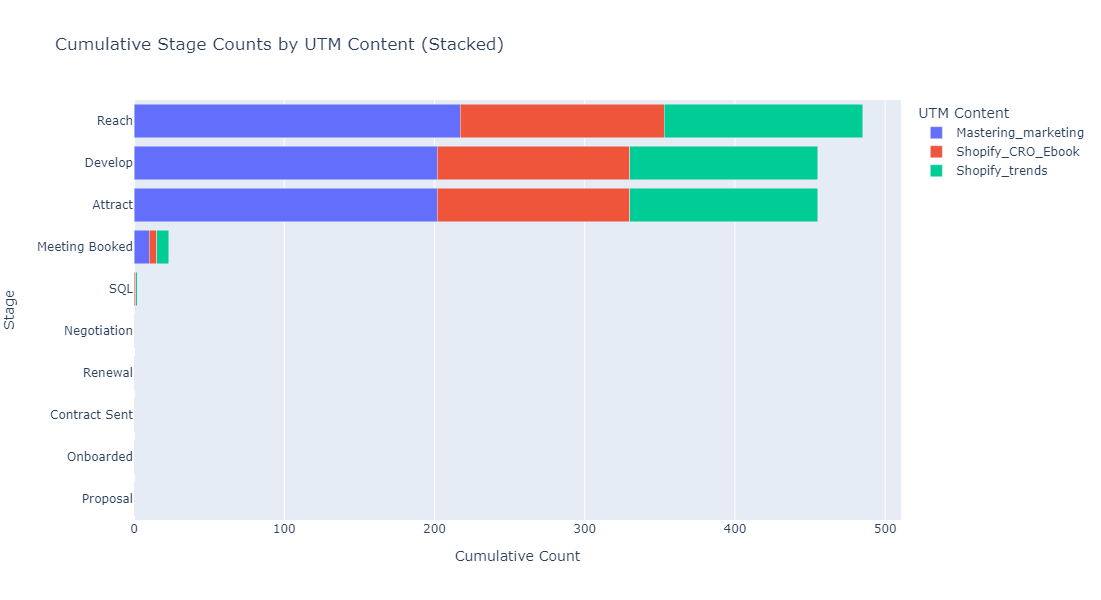

In [32]:

# Create a stacked horizontal bar graph using Plotly
fig = px.bar(
    cum_stages_breakdown,
    x='Cumulative Count',
    y='Stage',
    color=breakdown_column,  # Color bars based on the breakdown column
    orientation='h',         # Horizontal orientation
    barmode='stack',         # Stack bars within each stage
    labels={'Cumulative Count': 'Cumulative Count', 'Stage': 'Stage'},
    title=f'Cumulative Stage Counts by {breakdown_column} (Stacked)'
)

# Update layout for better visualization
fig.update_layout(
    yaxis={'categoryorder': 'total ascending'},  # Reverse the stage order
    xaxis_title='Cumulative Count',
    yaxis_title='Stage',
    legend_title=breakdown_column,
    width=800,
    height=600
)

# Show the plot
fig.show()


In [42]:
# Define the ordered list of stages
# Function to transform the data for cumulative analysis
def expand_cumulative_stages(df, stages, stage_col='Stage'):
    expanded_data = []
    
    # Iterate through each row in the DataFrame
    for _, row in df.iterrows():
        current_stage_index = stages.index(row[stage_col])
        
        # Repeat the row for the current stage and all preceding stages
        for stage in stages[:current_stage_index + 1]:
            new_row = row.copy()
            new_row[stage_col] = stage
            expanded_data.append(new_row)
    
    # Create a new DataFrame with the expanded data
    expanded_df = pd.DataFrame(expanded_data)
    return expanded_df

# Apply the transformation to create cumulative stages
df_cum = expand_cumulative_stages(df, stages)


In [36]:
len(cum_stages_breakdown_expanded)

7496

In [47]:
# Now, you can easily group by any column for cumulative analysis
cumulative_grouped = cum_stages_breakdown_expanded.groupby(['Stage'])['ID'].count().reset_index()
cumulative_grouped

,Stage,ID
0,Attract,3095
1,Contract Sent,8
2,Develop,864
3,Meeting Booked,78
4,Negotiation,3
5,Onboarded,29
6,Proposal,38
7,Reach,3319
8,Renewal,5
9,SQL,57


In [33]:
import ipywidgets as widgets
from IPython.display import display

# Define possible filter variables
filter_vars = ['Lead Status', 'Responsible']  # Add more variables if needed

# Create dropdown widgets for filter variable and filter value
filter_var_dropdown = widgets.Dropdown(
    options=filter_vars,
    value='Lead Status',  # Default selection
    description='Filter By:'
)

filter_value_dropdown = widgets.Dropdown(
    description='Filter Value:'
)

# Function to update the filter values dropdown based on selected filter variable
def update_filter_values(filter_var):
    unique_values = cum_stages_breakdown[filter_var].dropna().unique().tolist()
    unique_values.insert(0, 'All')  # Add 'All' option
    filter_value_dropdown.options = unique_values
    filter_value_dropdown.value = 'All'

# Initialize filter values dropdown
update_filter_values(filter_var_dropdown.value)

# Function to update the Plotly chart based on selected filters
def update_chart(filter_var, filter_value):
    # Filter the DataFrame based on selected filter variable and value
    if filter_value == 'All':
        filtered_df = cum_stages_breakdown
    else:
        filtered_df = cum_stages_breakdown[cum_stages_breakdown[filter_var] == filter_value]

    # Create a stacked horizontal bar graph with the filtered data
    fig = px.bar(
        filtered_df,
        x='Cumulative Count',
        y='Stage',
        color=breakdown_column,
        orientation='h',
        barmode='stack',
        labels={'Cumulative Count': 'Cumulative Count', 'Stage': 'Stage'},
        title=f'Cumulative Stage Counts by {breakdown_column} (Filtered by {filter_var} = {filter_value})'
    )

    # Reverse the y-axis order to display stages in descending order
    fig.update_layout(
        yaxis={'categoryorder': 'total ascending'},
        xaxis_title='Cumulative Count',
        yaxis_title='Stage',
        legend_title=breakdown_column,
        width=800,
        height=600
    )

    # Show the plot
    fig.show()

# Display the dropdowns and attach them to the update functions
filter_var_dropdown.observe(lambda change: update_filter_values(change.new), names='value')
widgets.interactive(update_chart, filter_var=filter_var_dropdown, filter_value=filter_value_dropdown)

# Display the dropdowns
display(filter_var_dropdown, filter_value_dropdown)

KeyError: 'Lead Status'